In [1]:
import os
import time
import numpy as np
from copy import deepcopy
from scipy.stats import poisson

from scipy.integrate import simpson
from scipy.optimize import curve_fit
from astropy.io import fits
import astropy.constants as const
from astropy.table import Table
from astropy import units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord
from astropy.time import Time

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
fs= 10
matplotlib.rcParams['font.size']=fs
ms = 6
matplotlib.rcParams['lines.markersize']=ms

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)

In [2]:
cwd = Path().resolve()
path = cwd / "apjaca283t6_ascii.txt"

In [3]:
df = pd.read_table(path)
df

,IAU Name,sigma log day,tau log day,T _peak log K,L _BBlog erg s^-1,t _0 log day,t _0 (p = 5/3) log day,p,L _g log erg s^-1,dT/dt 10^2 K day^-1,t _peak MJD,Unnamed: 11
0,AT2018zr,${1.16}_{-0.04}^{+0.04}$,${1.83}_{-0.03}^{+0.03}$,${4.14}_{-0.01}^{+0.01}$,${43.71}_{-0.04}^{+0.07}$,${1.36}_{-0.19}^{+0.15}$,${2.04}_{-0.03}^{+0.03}$,$-{0.78}_{-0.12}^{+0.09}$,${43.55}_{-0.02}^{+0.02}$,${0.56}_{-0.04}^{+0.05}$,${58202.06}_{-4.24}^{+1.88}$,NaN
1,AT2018bsi,${1.40}_{-0.35}^{+0.07}$,${1.60}_{-0.14}^{+0.26}$,${4.30}_{-0.03}^{+0.03}$,${43.96}_{-0.08}^{+0.14}$,${1.97}_{-0.29}^{+0.19}$,${1.72}_{-0.10}^{+0.09}$,$-{2.92}_{-0.86}^{+0.93}$,${43.51}_{-0.05}^{+0.05}$,$-{0.76}_{-0.15}^{+0.66}$,${58212.63}_{-5.33}^{+7.92}$,NaN
2,AT2018hco,${1.06}_{-0.02}^{+0.02}$,${2.04}_{-0.02}^{+0.02}$,${4.32}_{-0.01}^{+0.01}$,${44.18}_{-0.03}^{+0.06}$,${1.98}_{-0.14}^{+0.11}$,${2.06}_{-0.02}^{+0.02}$,$-{1.68}_{-0.26}^{+0.27}$,${43.75}_{-0.01}^{+0.01}$,$-{0.12}_{-0.04}^{+0.05}$,${58409.75}_{-2.07}^{+2.12}$,NaN
3,AT2018iih,${1.36}_{-0.01}^{+0.01}$,${2.06}_{-0.03}^{+0.03}$,${4.22}_{-0.02}^{+0.02}$,${44.71}_{-0.07}^{+0.08}$,${1.62}_{-0.19}^{+0.19}$,${2.20}_{-0.04}^{+0.04}$,$-{0.88}_{-0.15}^{+0.14}$,${44.39}_{-0.02}^{+0.02}$,${0.09}_{-0.07}^{+0.04}$,${58459.66}_{-2.38}^{+2.14}$,NaN
4,AT2018hyz,${0.73}_{-0.50}^{+0.55}$,${1.71}_{-0.01}^{+0.01}$,${4.21}_{-0.01}^{+0.01}$,${44.30}_{-0.16}^{+0.22}$,${1.29}_{-0.19}^{+0.10}$,${1.54}_{-0.09}^{+0.09}$,$-{1.20}_{-0.09}^{+0.08}$,${43.95}_{-0.08}^{+0.07}$,${0.13}_{-0.04}^{+0.04}$,${58424.96}_{-6.63}^{+7.90}$,NaN
5,AT2018lni,${1.36}_{-0.02}^{+0.02}$,${1.78}_{-0.02}^{+0.02}$,${4.34}_{-0.03}^{+0.03}$,${44.39}_{-0.04}^{+0.07}$,${2.00}_{-0.17}^{+0.17}$,${1.96}_{-0.06}^{+0.07}$,$-{2.51}_{-0.71}^{+0.50}$,${43.92}_{-0.02}^{+0.02}$,$-{0.20}_{-0.13}^{+0.17}$,${58477.08}_{-2.81}^{+2.16}$,NaN
6,AT2018lna,${1.08}_{-0.04}^{+0.04}$,${1.66}_{-0.02}^{+0.02}$,${4.50}_{-0.01}^{+0.02}$,${44.53}_{-0.04}^{+0.07}$,${1.62}_{-0.16}^{+0.13}$,${1.70}_{-0.04}^{+0.05}$,$-{2.20}_{-0.40}^{+0.38}$,${43.67}_{-0.01}^{+0.01}$,$-{0.36}_{-0.16}^{+0.20}$,${58507.58}_{-2.49}^{+1.59}$,NaN
7,AT2018jbv,${1.40}_{-0.10}^{+0.07}$,${2.02}_{-0.03}^{+0.03}$,${4.50}_{-0.01}^{+0.01}$,${45.57}_{-0.06}^{+0.09}$,${1.82}_{-0.15}^{+0.13}$,${1.91}_{-0.02}^{+0.02}$,$-{1.78}_{-0.24}^{+0.22}$,${44.69}_{-0.02}^{+0.02}$,$-{0.46}_{-0.05}^{+0.05}$,${58469.19}_{-2.40}^{+2.47}$,NaN
8,AT2019cho,${1.33}_{-0.07}^{+0.06}$,${1.89}_{-0.03}^{+0.04}$,${4.11}_{-0.02}^{+0.02}$,${43.85}_{-0.04}^{+0.05}$,${2.22}_{-0.18}^{+0.15}$,${2.32}_{-0.14}^{+0.23}$,$-{3.00}_{-0.72}^{+0.72}$,${43.69}_{-0.03}^{+0.03}$,${0.47}_{-0.31}^{+0.28}$,${58552.00}_{-2.32}^{+2.44}$,NaN
9,AT2019bhf,${0.87}_{-0.22}^{+0.07}$,${1.65}_{-0.03}^{+0.03}$,${4.23}_{-0.04}^{+0.04}$,${44.03}_{-0.05}^{+0.08}$,${1.76}_{-0.25}^{+0.21}$,${1.68}_{-0.06}^{+0.06}$,$-{2.23}_{-0.69}^{+0.61}$,${43.76}_{-0.04}^{+0.04}$,$-{0.09}_{-0.21}^{+0.20}$,${58543.90}_{-1.87}^{+1.47}$,NaN


In [4]:
df.columns

Index(['IAU Name', 'sigma log day', 'tau log day', 'T _peak log K',
       'L _BBlog erg s^-1', 't _0 log day', 't _0 (p = 5/3) log day', 'p',
       'L _g log erg s^-1', 'dT/dt 10^2 K day^-1', 't _peak MJD',
       'Unnamed: 11'],
      dtype='object')

In [5]:
lums = df["L _BBlog erg s^-1"].tolist()[:-1]
lums = [float(x.split("}")[0].split("{")[1]) for x in lums]

Text(0.5, 0, 'L$_{BBlog}$ erg s$^{-1}$')

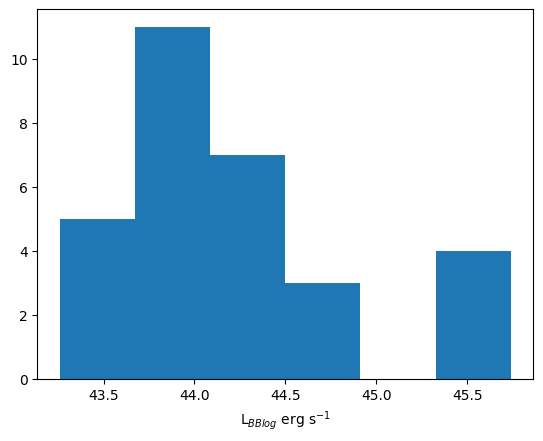

In [6]:
plt.hist(lums, bins=6)
plt.xlabel(r"L$_{BBlog}$ erg s$^{-1}$")

In [7]:
featureless = [x for x in lums if x > 45.]
regular = [x for x in lums if x <= 45.]

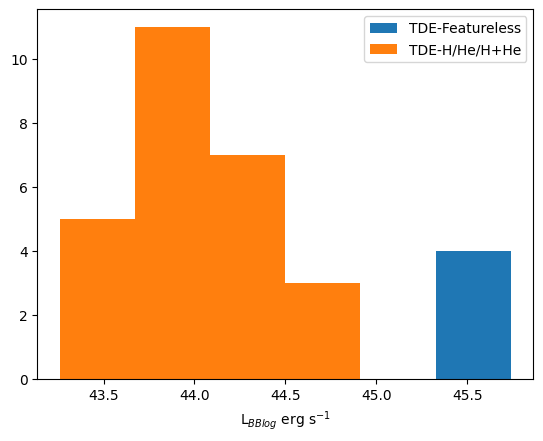

In [8]:
plt.hist([featureless, regular], bins=6, label=["TDE-Featureless", "TDE-H/He/H+He"], stacked=True)
plt.xlabel(r"L$_{BBlog}$ erg s$^{-1}$")
plt.legend()

[0 3 2 5 6 2 5 1 2 0 0 0 0 0 0 0 0 0 0]


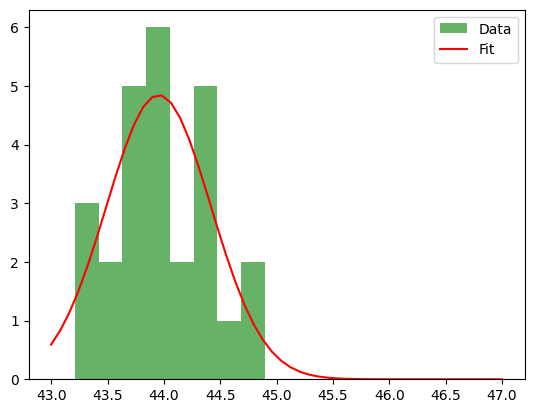

Amplitude: 4.845879115383125, Mean: 43.953638210600616, Standard Deviation: 0.46514661369151544


In [9]:
# Define the Gaussian function
def gaussian(x, amp, mean, stddev):
    return amp * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Your data
data = np.random.normal(loc=0, scale=1, size=1000)

data = regular
bins = np.linspace(43., 47., 20)
xplot = np.linspace(bins[0], bins[-1], 50)
density=False

hist, bin_edges = np.histogram(data, bins=bins, density=density)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

print(hist)

# Fit the Gaussian to the data
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[1, np.median(data), 1])

# Plot the data and the fit
plt.hist(data, bins=bins, density=density, alpha=0.6, color='g', label='Data')
plt.plot(xplot, gaussian(xplot, *popt), color='red', label='Fit')
plt.legend()
plt.show()

# Print the fit parameters
print(f"Amplitude: {popt[0]}, Mean: {popt[1]}, Standard Deviation: {popt[2]}")

[0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 0 0 0 0]


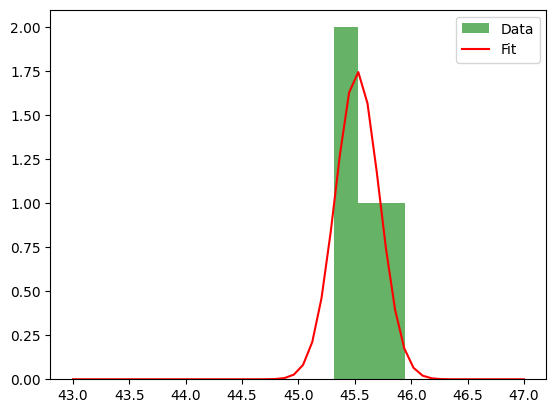

Amplitude: 1.747243250803097, Mean: 45.52178891329398, Standard Deviation: 0.1944254358144727


In [10]:
# Your data
# data = np.random.normal(loc=0, scale=1, size=1000)

data = featureless

hist, bin_edges = np.histogram(featureless, bins=bins, density=density)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

print(hist)

# Fit the Gaussian to the data
popt_f, pcov = curve_fit(gaussian, bin_centers, hist, p0=[1, np.median(data), 1])

# Plot the data and the fit
plt.hist(data, bins=bins, density=density, alpha=0.6, color='g', label='Data')
plt.plot(xplot, gaussian(xplot, *popt_f), color='red', label='Fit')
plt.legend()
plt.show()

# Print the fit parameters
print(f"Amplitude: {popt_f[0]}, Mean: {popt_f[1]}, Standard Deviation: {popt_f[2]}")

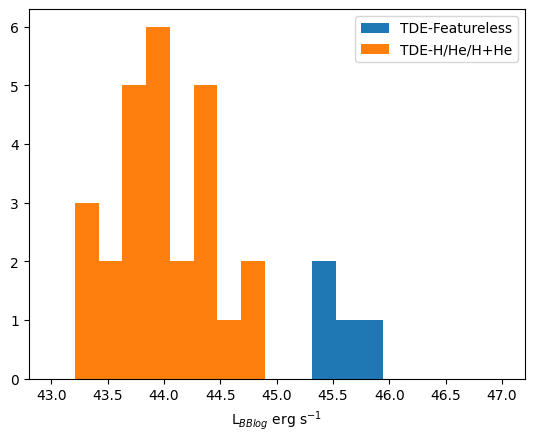

In [11]:
n_bin_plot = 6
# ratio = len(lums) / len(regular)

plt.hist([featureless, regular], bins=bins, label=["TDE-Featureless", "TDE-H/He/H+He"], stacked=True, density=density)
# plt.plot(xplot, gaussian(xplot, *popt), color='k', label='Fit')
# plt.plot(xplot, gaussian(xplot, *popt_f), color='k')

plt.xlabel(r"L$_{BBlog}$ erg s$^{-1}$")
plt.legend()

In [12]:
def compute_universe_size():
    zs = np.array([0.1, 0.5, 1,2,3,6,10])
    Vs_Gpc3 = np.zeros(len(zs))
    for i in range(len(zs)):
        z = zs[i]
        D_Mpc = cosmo.comoving_distance([z])[0].value 
        V_Mpc3 = 4*np.pi / 3 * D_Mpc**3
        Vs_Gpc3[i] = V_Mpc3 / 1e+9
    
    plt.plot(zs, Vs_Gpc3, "o")
    plt.semilogy()
    plt.semilogx()
    plt.xlabel("z")
    plt.ylabel("Comoving volume (Gpc^3)")

In [13]:
def get_gmf_z(z = 4, lgxs = np.linspace(7, 11.5)):
    
    # get galaxy stellar mass function 
    xs = 10**lgxs
    
    if z==0:
        # Wright+2017
        lgM0 = 10.84
        lgphi1 = -4.30
        alpha1 = -0.
        lgphi2 = -3.94
        alpha2 = -1.79
        M0 = 10**lgM0
        phi1 = 10**lgphi1
        phi2 = 10**lgphi2
        phi = np.log(10) * np.exp(-(xs/M0)) * (xs/M0) * (phi1 * (xs/M0)**alpha1 + phi2 * (xs/M0)**alpha2)
        
    elif z>=4:
        # Song+2016
        if z==4:
            lgM0 = 10.50
            alpha = -1.55
            phi0 = 25.68e-5
        elif z==5:
            lgM0 = 10.97
            alpha = -1.70
            phi0 = 5.16e-5
        elif z==6:
            lgM0 = 10.72
            alpha = -1.91
            phi0 = 1.35e-5
        elif z==7:
            lgM0 = 10.78
            alpha = -1.95
            phi0 = 0.53e-5
        elif z==8:
            lgM0 = 10.72
            alpha = -2.25
            phi0 = 0.035e-5
        M0 = 10**lgM0
            
        phi = phi0 * (xs/M0) * (xs/M0)**alpha * np.exp(-(xs/M0))
    elif z<4:
        # Mcleod+2021
        if z==0.5:
            lgM0 = 10.80
            lgphi1 = -2.77
            alpha1 = -0.61
            lgphi2 = -3.26
            alpha2 = -1.52
        elif z==1.0:
            lgM0 = 10.72
            lgphi1 = -2.80
            alpha1 = -0.46
            lgphi2 = -3.26
            alpha2 = -1.53
        elif z==1.5:
            lgM0 = 10.72
            lgphi1 = -2.94
            alpha1 = -0.55
            lgphi2 = -3.54
            alpha2 = -1.65
        elif z==2.0:
            lgM0 = 10.77
            lgphi1 = -3.18
            alpha1 = -0.68
            lgphi2 = -3.84
            alpha2 = -1.73
        elif z==2.5:
            lgM0 = 10.77
            lgphi1 = -3.39
            alpha1 = -0.62
            lgphi2 = -3.78
            alpha2 = -1.74
        elif z==3.25:
            lgM0 = 10.84
            lgphi1 = -4.30
            alpha1 = -0.
            lgphi2 = -3.94
            alpha2 = -1.79
        M0 = 10**lgM0
        phi1 = 10**lgphi1
        phi2 = 10**lgphi2
        phi = np.log(10) * np.exp(-(xs/M0)) * (xs/M0) * (phi1 * (xs/M0)**alpha1 + phi2 * (xs/M0)**alpha2)
        
    return phi


In [14]:
def planck_nu(T, Rbb, nu):
    '''
    T in the unit of K
    Rbb in the unit of Rsun
    lamb in the unit of Hz
    '''
    x = const.h.cgs.value * nu / (const.k_B.cgs.value * T)
    x = np.array(x)
    # erg/cm2/Ang/sr/s/Hz
    Bnu = (2. * const.h.cgs.value * nu**3 ) /  ( const.c.cgs.value**2 ) / (np.exp(x) - 1. ) 
    spec = Bnu
    # convert back to ANGSTROM   
    Rbb *= const.R_sun.cgs.value
    spec1 = spec * (4. * np.pi * Rbb**2) * np.pi # erg/Hz/s
    # spec1 *= 1./ (4*np.pi*D**2) to correct for distance
    return spec1

0.5 0.009871640071102908
1.0 0.00852926875360485
1.5 0.006374552170174463
2.0 0.004415069579885345
2.5 0.004433195914936573
3.25 0.0034791223430616315
4.0 0.0009422292465104851
5.0 0.0006413142966104425
6.0 0.00019490057088089425
7.0 9.927574954186267e-05
8.0 1.4265550542638443e-05


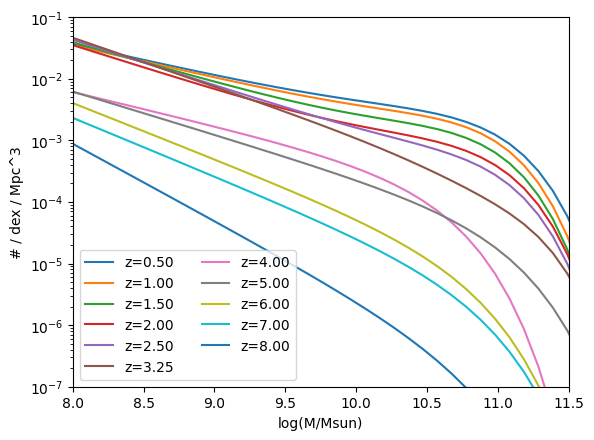

In [15]:
def plot_gmf_z():
    lgxs = np.linspace(7, 12)
    zs = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.25, 4, 5,6,7,8])
    zs_bounds = np.array([0.3, 0.75, 1.25, 1.75, 2.25, 2.8, 3.7, 4.5, 5.5, 6.5, 7.5, 8.5])
    zs_left = zs_bounds[:-1]
    zs_right = zs_bounds[1:]
    
    
    ns = np.zeros(len(zs))
    plt.figure()
    ax = plt.subplot(111)
    for i in range(len(zs)):
        z = zs[i]
        phi = get_gmf_z(z, lgxs)
        
        ax.plot(lgxs, phi, label = "z=%.2f"%z)
        
        mask = (lgxs >= 9)
        x_selected = lgxs[mask]
        y_selected = phi[mask]
        
        # Perform numerical integration using Simpson's rule
        n = simpson(y_selected, x=x_selected)
        print (z, n)
        ns[i] = n
    ax.semilogy()
    ax.legend(ncol = 2)
    ax.set_xlim(8, 11.5)
    ax.set_ylim(1e-7, 1e-1)
    ax.set_xlabel("log(M/Msun)")
    ax.set_ylabel("# / dex / Mpc^3")
    return ns

ns = plot_gmf_z()

0.5 0.009871640071102908
1.0 0.00852926875360485
1.5 0.006374552170174463
2.0 0.004415069579885345
2.5 0.004433195914936573
3.25 0.0034791223430616315
4.0 0.0009422292465104851
5.0 0.0006413142966104425
6.0 0.00019490057088089425
7.0 9.927574954186267e-05
8.0 1.4265550542638443e-05
Optical TDE. Lbb = 6.98 e+43 erg/s
70708006045.87729 Mpc^3
165023087116.50046 Mpc^3
219470346821.68292 Mpc^3
242659855803.21188 Mpc^3
272415579850.50668 Mpc^3
430494877343.578 Mpc^3
354450143823.4982 Mpc^3
402179378555.2539 Mpc^3
359839667448.07947 Mpc^3
322718763843.4642 Mpc^3
290793997187.8158 Mpc^3


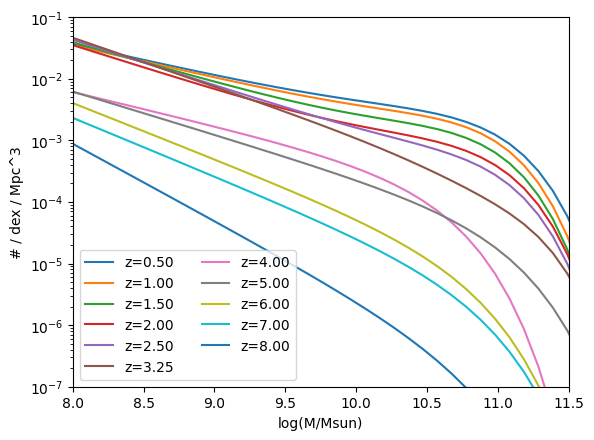

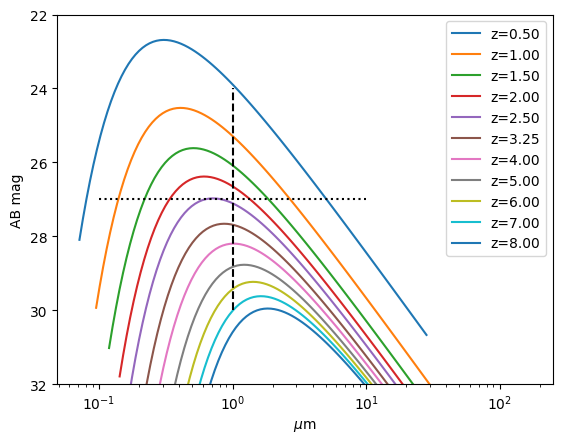

In [16]:
def plot_tde_sed(l_scale = 1.0):
    
    ns = plot_gmf_z()
    zs = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.25, 4, 5,6,7,8])
    zs_bounds = np.array([0.3, 0.75, 1.25, 1.75, 2.25, 2.8, 3.7, 4.5, 5.5, 6.5, 7.5, 8.5])
    zs_left = zs_bounds[:-1]
    zs_right = zs_bounds[1:]
    
    Ns = np.zeros(len(zs))
    
    frac_area = 24 / (4*np.pi/np.pi**2*180**2)
    
    nu_rest = np.logspace(13.2, 15.8, 100)
    lam_rest_um = const.c.cgs.value / nu_rest * 10 * 1e+3
    
    # typical optical pars
    T1 = 2.5e+4
    Rbb1 = 7.2e+3 * l_scale #Rsun, 10**14.7 / const.R_sun.cgs.value
    Lbb1 = const.sigma_sb.cgs.value * T1**4 * 4 * np.pi * (Rbb1 * const.R_sun.cgs.value)**2
    print ("Optical TDE. Lbb = %.2f e+43 erg/s"%(Lbb1 / 1e+43))

    plt.figure()
    ax = plt.subplot(111)
    for i in range(len(zs)):
        myz = zs[i]
        zleft = zs_left[i]
        zright = zs_right[i]
        # comoving volume 
        D_L_Mpc = cosmo.luminosity_distance(myz).value
        D_L_cm = D_L_Mpc * const.pc.cgs.value * 1e+6
        
        D_cd_Mpc_left = cosmo.comoving_distance(zleft).value
        D_cd_Mpc_right = cosmo.comoving_distance(zright).value
        V_c_Mpc3 = 4*np.pi/3 * (D_cd_Mpc_right**3 - D_cd_Mpc_left**3)
        
        
        nu_obs = nu_rest / (1+myz)
        lam_obs_um = lam_rest_um * (1+myz)
        spec1 = planck_nu(T1, Rbb1, nu_rest)
        flux1 = spec1 / (4 * np.pi * D_L_cm**2) # erg/Hz/s/cm^2
        mag1 = -2.5 * np.log10(flux1 / (3631e-23))
        
        ax.plot(lam_obs_um, mag1, label = "z=%.2f"%myz)
        print (V_c_Mpc3, "Mpc^3")
        
        Ns[i] = frac_area * V_c_Mpc3 * ns[i] * 3e-5
    ax.set_ylim(32, 22)
        
    ax.legend()
    ax.semilogx()
    ax.set_xlabel(r"$\mu$"+"m")
    ax.set_ylabel("AB mag")
    ax.plot([0.1, 10], [27, 27], "k:")
    ax.plot([1, 1], [30, 24], "k--")

plot_tde_sed()

0.5 0.009871640071102908
1.0 0.00852926875360485
1.5 0.006374552170174463
2.0 0.004415069579885345
2.5 0.004433195914936573
3.25 0.0034791223430616315
4.0 0.0009422292465104851
5.0 0.0006413142966104425
6.0 0.00019490057088089425
7.0 9.927574954186267e-05
8.0 1.4265550542638443e-05
Optical TDE. Lbb = 62.85 e+43 erg/s
70708006045.87729 Mpc^3
165023087116.50046 Mpc^3
219470346821.68292 Mpc^3
242659855803.21188 Mpc^3
272415579850.50668 Mpc^3
430494877343.578 Mpc^3
354450143823.4982 Mpc^3
402179378555.2539 Mpc^3
359839667448.07947 Mpc^3
322718763843.4642 Mpc^3
290793997187.8158 Mpc^3


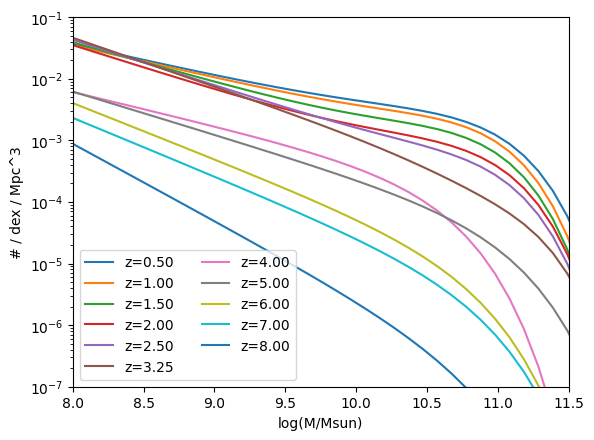

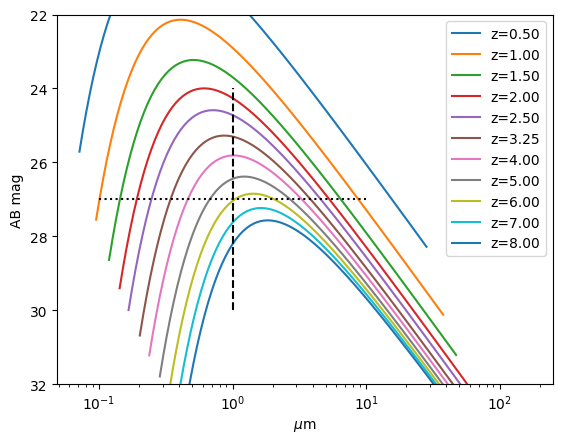

In [17]:
plot_tde_sed(3.)